# Day 4: Matrix Multiplication

Welcome to Day 4! Today we tackle one of the most fundamental and powerful operations in linear algebra: **matrix multiplication**. This operation is at the heart of nearly every machine learning algorithm, from neural networks to principal component analysis.

Unlike matrix addition and scalar multiplication, matrix multiplication is _not_ element-wise. It involves a specific row-by-column multiplication and summation process.

## Objectives for Today:

- Understand the **rules** for matrix multiplication, especially dimension compatibility.
- Learn how to perform matrix multiplication using NumPy (`np.dot` and `@`).
- Understand the result's dimensions based on input matrix dimensions.
- Explore **matrix-vector multiplication** as a special case.
- Understand that matrix multiplication is generally **non-commutative**.
- Connect matrix multiplication to its crucial role in Machine Learning.


In [1]:
# Import necessary libraries
import numpy as np

## 1. Rules of Matrix Multiplication (A @ B)

### Concept

For two matrices $A$ and $B$ to be multiplied to form $C = A B$:

1.  **Dimension Compatibility:** The number of **columns** in the first matrix ($A$) must be equal to the number of **rows** in the second matrix ($B$).
    If $A$ is an `m x k` matrix and $B$ is a `k x n` matrix, then they can be multiplied.

2.  **Resulting Dimensions:** The resulting matrix $C$ will have dimensions `m x n` (number of rows from $A$ by number of columns from $B$).

    $$ (m \times k) \cdot (k \times n) = (m \times n) $$

3.  **Element Calculation:** Each element $c_{ij}$ in the resulting matrix $C$ is computed by taking the **dot product** of the $i$-th row of matrix $A$ and the $j$-th column of matrix $B$.

    Example: For $A = \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix}$ and $B = \begin{pmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{pmatrix}$,
    $C = A B = \begin{pmatrix} a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\ a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{12} + a_{22}b_{22} \end{pmatrix}$

### NumPy Practice

NumPy provides `np.dot()` and the `@` operator (introduced in Python 3.5) for matrix multiplication.


In [ ]:
# Example 1: Multiplying a 2x3 matrix by a 3x2 matrix
A = np.array([[1, 2, 3], [4, 5, 6]])

B = np.array([[7, 8], [9, 10], [11, 12]])

print("Matrix A (2x3):\n", A)
print("Shape of A:", A.shape)
print("\nMatrix B (3x2):\n", B)
print("Shape of B:", B.shape)

# Using np.dot()
C_dot = np.dot(A, B)
print("\nResult C = A . B (using np.dot):\n", C_dot)
print("Shape of C:", C_dot.shape)  # Should be (2, 2)

# Using the @ operator
C_at = A @ B
print("\nResult C = A @ B (using @ operator):\n", C_at)
print("Shape of C:", C_at.shape)  # Should be (2, 2)

# Example 2: Incompatible dimensions
D = np.array([[1, 2], [3, 4]])
E = np.array([[5, 6], [7, 8], [9, 10]])

print("\n---\n")
print("Matrix D (2x2):\n", D)
print("Shape of D:", D.shape)
print("\nMatrix E (3x2):\n", E)
print("Shape of E:", E.shape)

try:
    D @ E  # This will cause an error because (2x2) @ (3x2) is not compatible
except ValueError as e:
    print("\nError when trying D @ E (2x2 @ 3x2):", e)
    print("Reason: Number of columns in D (2) does not match number of rows in E (3).")

Matrix A (2x3):
 [[1 2 3]
 [4 5 6]]
Shape of A: (2, 3)

Matrix B (3x2):
 [[ 7  8]
 [ 9 10]
 [11 12]]
Shape of B: (3, 2)

Result C = A . B (using np.dot):
 [[ 58  64]
 [139 154]]
Shape of C: (2, 2)

Result C = A @ B (using @ operator):
 [[ 58  64]
 [139 154]]
Shape of C: (2, 2)

---

Matrix D (2x2):
 [[1 2]
 [3 4]]
Shape of D: (2, 2)

Matrix E (3x2):
 [[ 5  6]
 [ 7  8]
 [ 9 10]]
Shape of E: (3, 2)

Error when trying D @ E (2x2 @ 3x2): matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)
Reason: Number of columns in D (2) does not match number of rows in E (3).


### **Exercise 1: Basic Matrix Multiplication**

Given the following matrices:

```python
X = np.array([
    [1, 0, 1],
    [2, 1, 0],
])

Y = np.array([
    [1, 2],
    [0, 1],
    [3, 0]
])
```

1.  Print `X`, `Y`, and their shapes.
2.  Predict the shape of the result `Z = X @ Y`.
3.  Calculate `Z` using the `@` operator.
4.  Print `Z` and its shape, verifying your prediction.


In [ ]:
# Your code for Exercise 1 here

X = np.array(
    [
        [1, 0, 1],
        [2, 1, 0],
    ]
)

Y = np.array([[1, 2], [0, 1], [3, 0]])

print("Matrix X ({}x{}):\n{}".format(*X.shape, X))
print("\nMatrix Y ({}x{}):\n{}".format(*Y.shape, Y))

# predict Z with @

Z = X @ Y


print("\nThe product of X*Y = Z ({}x{}):\n{}".format(*Z.shape, Z))

Matrix X (2x3):
[[1 0 1]
 [2 1 0]]

Matrix Y (3x2):
[[1 2]
 [0 1]
 [3 0]]

The product of X*Y = Z (2x2):
[[4 2]
 [2 5]]


In [ ]:
# Solution for Exercise 1
X = np.array(
    [
        [1, 0, 1],
        [2, 1, 0],
    ]
)

Y = np.array([[1, 2], [0, 1], [3, 0]])

print("Matrix X ({}x{}):\n{}".format(*X.shape, X))
print("Matrix Y ({}x{}):\n{}".format(*Y.shape, Y))

print(
    "\nPrediction for Z = X @ Y shape: (rows of X) x (columns of Y) = {}x{}".format(
        X.shape[0], Y.shape[1]
    )
)

Z = X @ Y

print("\nResult Z ({}x{}):\n{}".format(*Z.shape, Z))
print("Shape of Z:", Z.shape)

## 2. Matrix-Vector Multiplication

### Concept

Matrix-vector multiplication is a special case of matrix multiplication where the second matrix ($B$) is a column vector.

If $A$ is an `m x n` matrix and $v$ is an `n`-dimensional vector (which can be treated as an `n x 1` column matrix), then the result $b = A v$ is an `m`-dimensional vector (or `m x 1` column matrix).

Each element of the resulting vector $b$ is the dot product of a row of $A$ with the vector $v$.

### NumPy Practice

NumPy handles this naturally with `np.dot()` or `@`. A 1D NumPy array `(n,)` is correctly interpreted as a column vector `(n,1)` for this operation.


Transformation Matrix T (2x2):
 [[2 0]
 [0 3]]
Shape of T: (2, 2)

Vector v (2,): [1 1]
Shape of v: (2,)

Transformed Vector (T @ v): [2 3]
Shape of Transformed Vector: (2,)


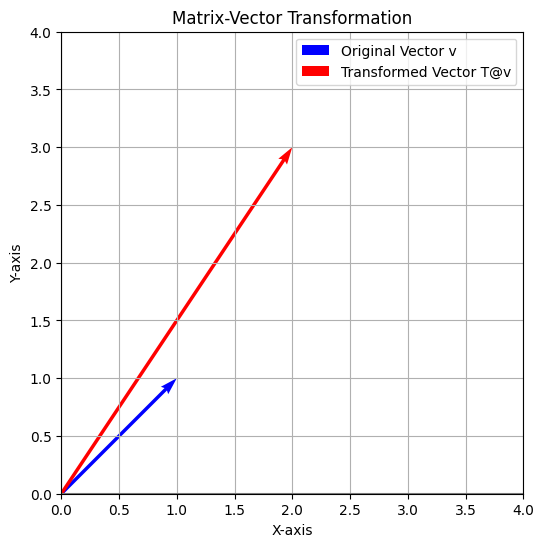

In [15]:
# Example: Transformation of a vector
T = np.array([[2, 0], [0, 3]])

v = np.array([1, 1])

print("Transformation Matrix T (2x2):\n", T)
print("Shape of T:", T.shape)
print("\nVector v (2,):", v)
print("Shape of v:", v.shape)

transformed_v = T @ v

print("\nTransformed Vector (T @ v):", transformed_v)
print("Shape of Transformed Vector:", transformed_v.shape)  # Still (2,)

# Let's visualize this transformation
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.quiver(
    0,
    0,
    v[0],
    v[1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="blue",
    label="Original Vector v",
)
plt.quiver(
    0,
    0,
    transformed_v[0],
    transformed_v[1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="red",
    label="Transformed Vector T@v",
)

plt.xlim(0, 4)
plt.ylim(0, 4)
plt.axvline(x=0, color="gray")
plt.axhline(y=0, color="gray")
plt.grid()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Matrix-Vector Transformation")
plt.legend()
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

### **Exercise 2: Matrix-Vector Multiplication (Neural Network Application)**

In a simple neural network, the output of a layer is often calculated by multiplying the input vector by a weight matrix and then adding a bias. Let's simplify and just consider the multiplication part.

Given an `input_features` vector and a `weights` matrix:

```python
input_features = np.array([0.5, 1.2, -0.3]) # Example: [feature1, feature2, feature3]

weights = np.array([
    [0.1, 0.4],
    [0.7, 0.2],
    [0.3, 0.9]
]) # Example: (number of input features) x (number of neurons in next layer)
```

1.  Print `input_features`, `weights`, and their shapes.
2.  Predict the shape of the result `output_activations = input_features @ weights`.
3.  Calculate `output_activations`.
4.  Print the `output_activations` vector and its shape.
5.  Explain in your own words what each element in `output_activations` conceptually represents in this simple neural network context.


In [ ]:
# Your code for Exercise 2 here
input_features = np.array([0.5, 1.2, -0.3])

weights = np.array([[0.1, 0.4], [0.7, 0.2], [0.3, 0.9]])

print("\nInput Features Vector ({}):\n".format(input_features.shape, input_features))
print("\nWeights Matrix ({}x{}):\n".format(*weights.shape, weights))

output_activations = input_features @ weights

print(
    "\nOutput Activations ({}):\n{}".format(
        output_activations.shape, output_activations
    )
)
print("\nShape of the Output Activations:", output_activations.shape)
# Your explanation here:
# (Type your answer here as a Python comment or in a markdown cell below)


Input Features Vector ((3,)):


Weights Matrix (3x2):


Output Activations ((2,)):
[0.8  0.17]

Shape of the Output Activations: (2,)


In this context, each element in the `output_activation` vector represents the 'activation' or weightened sum

For a particular neuron in the next layer of the neural network. For example, `output_activation[0]` is the weightened sum of `input_features` where the weights are taken from the first column of the `weights` matrix.

This is a fundamental step before applying an activation function (like ReLu or Sigmoid) to introduce non-linearity.

In [ ]:
# Solution for Exercise 2
input_features = np.array([0.5, 1.2, -0.3])

weights = np.array([[0.1, 0.4], [0.7, 0.2], [0.3, 0.9]])

print("Input Features Vector ({}):\n{}".format(input_features.shape, input_features))
print("Weights Matrix ({}x{}):\n{}".format(*weights.shape, weights))

print(
    "\nPrediction for output_activations shape: (rows of input_features is effectively 1) x (columns of weights) = (1, {}) or just ({},)".format(
        weights.shape[1], weights.shape[1]
    )
)

output_activations = input_features @ weights

print(
    "\nOutput Activations Vector ({}):\n{}".format(
        output_activations.shape, output_activations
    )
)
print("Shape of Output Activations:", output_activations.shape)

print("\nExplanation:\n")
print(
    "In this context, each element in the `output_activations` vector represents the 'activation' or 'weighted sum'\n",
    "for a particular neuron in the next layer of the neural network. For example, `output_activations[0]`\n",
    "is the weighted sum of `input_features` where the weights are taken from the first column of the `weights` matrix.\n",
    "This is a fundamental step before applying an activation function (like ReLU or Sigmoid) to introduce non-linearity.",
)

Input Features Vector ((3,)):
[ 0.5  1.2 -0.3]
Weights Matrix (3x2):
[[0.1 0.4]
 [0.7 0.2]
 [0.3 0.9]]

Prediction for output_activations shape: (rows of input_features is effectively 1) x (columns of weights) = (1, 2) or just (2,)

Output Activations Vector ((2,)):
[0.8  0.17]
Shape of Output Activations: (2,)

Explanation:

In this context, each element in the `output_activations` vector represents the 'activation' or 'weighted sum'
 for a particular neuron in the next layer of the neural network. For example, `output_activations[0]`
 is the weighted sum of `input_features` where the weights are taken from the first column of the `weights` matrix.
 This is a fundamental step before applying an activation function (like ReLU or Sigmoid) to introduce non-linearity.


## 3. Properties: Matrix Multiplication is Generally Non-Commutative

### Concept

One crucial property of matrix multiplication is that it is generally **not commutative**. This means that for two matrices $A$ and $B$, $A B \neq B A$. In fact, $B A$ might not even be defined if the dimensions don't match (as we saw in an earlier example).

Even for square matrices where both $A B$ and $B A$ are defined and have the same dimensions, the results are almost always different.

### NumPy Practice

Let's demonstrate this with an example.


In [19]:
matrix_A = np.array([[1, 2], [3, 4]])

matrix_B = np.array([[5, 6], [7, 8]])

print("Matrix A:\n", matrix_A)
print("\nMatrix B:\n", matrix_B)

# Calculate A @ B
AB = matrix_A @ matrix_B
print("\nResult of A @ B:\n", AB)

# Calculate B @ A
BA = matrix_B @ matrix_A
print("\nResult of B @ A:\n", BA)

# Check if they are equal
print("\nAre A @ B and B @ A equal?:", np.array_equal(AB, BA))

if not np.array_equal(AB, BA):
    print("This confirms that matrix multiplication is generally not commutative.")

Matrix A:
 [[1 2]
 [3 4]]

Matrix B:
 [[5 6]
 [7 8]]

Result of A @ B:
 [[19 22]
 [43 50]]

Result of B @ A:
 [[23 34]
 [31 46]]

Are A @ B and B @ A equal?: False
This confirms that matrix multiplication is generally not commutative.


### **Exercise 3: Demonstrating Non-Commutativity**

1.  Create two new distinct 3x3 square matrices, `M_alpha` and `M_beta`, with different integer values.
2.  Calculate `product1 = M_alpha @ M_beta`.
3.  Calculate `product2 = M_beta @ M_alpha`.
4.  Print `M_alpha`, `M_beta`, `product1`, and `product2`.
5.  Use `np.array_equal()` to explicitly check if `product1` and `product2` are identical and print the result.
6.  Briefly comment on the implications of non-commutativity in real-world applications (e.g., sequences of transformations).


In [22]:
# Your code for Exercise 3 here
M_alpha = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

M_beta = np.array([[4, 1, 2], [5, 4, 8], [4, 10, 2]])

product1 = M_alpha @ M_beta
product2 = M_beta @ M_alpha

print("\nM ⍺:", M_alpha)
print("\nM beta:", M_beta)
print("\n M_alpha @ M_beta:", product1)
print("\n M_beta @ M_alpha:", product2)
print("Are the two products equal?", np.array_equal(product1, product2))
# Your comment here:
# (Type your answer here as a Python comment or in a markdown cell below)


M ⍺: [[1 2 3]
 [4 5 6]
 [7 8 9]]

M beta: [[ 4  1  2]
 [ 5  4  8]
 [ 4 10  2]]

 M_alpha @ M_beta: [[ 26  39  24]
 [ 65  84  60]
 [104 129  96]]

 M_beta @ M_alpha: [[ 22  29  36]
 [ 77  94 111]
 [ 58  74  90]]
Are the two products equal? False


If you transform a coordinate plane by A and then B you get a different plane if you've done it in reverse order.

In [23]:
# Solution for Exercise 3
M_alpha = np.array([[1, 2, 3], [0, 1, 4], [5, 6, 7]])

M_beta = np.array([[8, 1, 2], [3, 0, 5], [6, 7, 0]])

print("Matrix M_alpha:\n", M_alpha)
print("\nMatrix M_beta:\n", M_beta)

product1 = M_alpha @ M_beta
print("\nResult of M_alpha @ M_beta (Product 1):\n", product1)

product2 = M_beta @ M_alpha
print("\nResult of M_beta @ M_alpha (Product 2):\n", product2)

are_equal = np.array_equal(product1, product2)
print("\nAre Product 1 and Product 2 equal?:", are_equal)

print("\nImplications of Non-Commutativity:\n")
print(
    "Non-commutativity means that the order of matrix multiplications matters significantly.\n",
    "In real-world applications, especially in computer graphics, robotics, or sequential data processing,\n",
    "a sequence of transformations (like rotations, scaling, translations represented by matrices)\n",
    "will produce different final results depending on the order in which they are applied. For example,\n",
    "rotating an object then moving it is generally not the same as moving it then rotating it.",
)

Matrix M_alpha:
 [[1 2 3]
 [0 1 4]
 [5 6 7]]

Matrix M_beta:
 [[8 1 2]
 [3 0 5]
 [6 7 0]]

Result of M_alpha @ M_beta (Product 1):
 [[ 32  22  12]
 [ 27  28   5]
 [100  54  40]]

Result of M_beta @ M_alpha (Product 2):
 [[18 29 42]
 [28 36 44]
 [ 6 19 46]]

Are Product 1 and Product 2 equal?: False

Implications of Non-Commutativity:

Non-commutativity means that the order of matrix multiplications matters significantly.
 In real-world applications, especially in computer graphics, robotics, or sequential data processing,
 a sequence of transformations (like rotations, scaling, translations represented by matrices)
 will produce different final results depending on the order in which they are applied. For example,
 rotating an object then moving it is generally not the same as moving it then rotating it.


## Day 4 Summary and ML Connection

Today was a deep dive into **matrix multiplication**, a concept that is absolutely fundamental to machine learning:

- We learned the strict rules for matrix multiplication: the inner dimensions must match, and the outer dimensions determine the result's shape.
- **NumPy's `@` operator** (or `np.dot()`) makes matrix multiplication efficient and easy in Python.
- **Matrix-vector multiplication** is a special case, crucial for applying transformations to individual data points or calculating neuron activations in neural networks.
- The **non-commutative** nature of matrix multiplication means the order of operations matters. This is vital when chaining transformations or processing sequential data.

**ML Connections Recap:**

- **Neural Networks:** Matrix multiplication forms the core of how information flows through layers. `Output = Input @ Weights + Bias` is the fundamental equation for a linear layer.
- **Data Transformations:** Scaling, rotation, and other linear transformations of data are all represented and performed via matrix multiplication.
- **Feature Engineering:** Creating new features from existing ones can sometimes involve matrix products.
- **Linear Regression:** The closed-form solution for ordinary least squares involves matrix multiplication and inverses (which we'll see soon!).

Understanding matrix multiplication deeply is a cornerstone for comprehending how most modern machine learning models operate. Keep practicing, and you'll find this operation becomes second nature!
